# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/Users/daniel/Desktop/y_bigta/0109_EDA:FE/Data/airbnb_listings.csv', index_col=0)

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_7253/1516998751.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/daniel/Desktop/y_bigta/0109_EDA:FE/Data/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
import pandas as pd
# Q1
pd.set_option('display.max_columns', None)
df.head(5)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [8]:
missing_values = df.isnull().sum()

# 결측치가 있는 컬럼만 선택
missing_values = missing_values[missing_values > 0]

# 결측치 비율 계산
missing_percentage = (missing_values / len(df)) * 100

# 결측치가 많은 순서대로 정렬
missing_info = pd.DataFrame({'결측치 수': missing_values, '결측치 비율 (%)': missing_percentage})
missing_info = missing_info.sort_values(by='결측치 수', ascending=False)

# 결측치가 0개인 컬럼은 제외
missing_info = missing_info[missing_info['결측치 수'] > 0]

# 결과 출력
print(missing_info)

                             결측치 수  결측치 비율 (%)
jurisdiction_names           50781   99.970470
license                      50759   99.927160
square_feet                  50407   99.234192
monthly_price                46119   90.792582
weekly_price                 45411   89.398772
host_response_rate           19006   37.416332
host_response_time           19006   37.416332
security_deposit             17325   34.107016
host_acceptance_rate         14015   27.590755
review_scores_value          11482   22.604142
review_scores_location       11482   22.604142
review_scores_checkin        11479   22.598236
review_scores_accuracy       11466   22.572644
review_scores_communication  11463   22.566738
review_scores_cleanliness    11452   22.545082
review_scores_rating         11431   22.503740
reviews_per_month            10453   20.578392
beds                           482    0.948894
bedrooms                        77    0.151587
bathrooms                       54    0.106308
host_identity

In [9]:
#Q2 
missing_values = df.isnull().sum()
missing_ratio = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_ratio], axis=1, keys=['Missing Values', 'Missing Ratio'])
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data = missing_data.sort_values(by='Missing Ratio', ascending=False)
missing_data


,Missing Values,Missing Ratio
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5261/468477361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_data, x=missing_data.index, y='Missing Ratio', palette=pastel_palette)
/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5261/468477361.py:5: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=missing_data, x=missing_data.index, y='Missing Ratio', palette=pastel_palette)


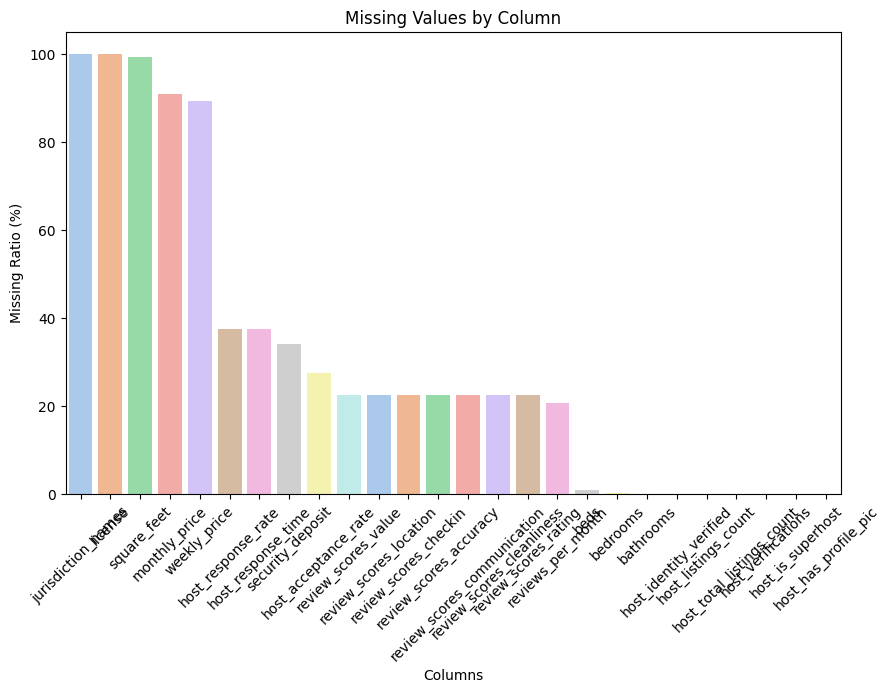

In [46]:
import seaborn as sns
plt.figure(figsize=(10, 6))
pastel_palette = sns.color_palette("pastel")
sns.set_palette(pastel_palette)
sns.barplot(data=missing_data, x=missing_data.index, y='Missing Ratio', palette=pastel_palette)
plt.xlabel('Columns')
plt.ylabel('Missing Ratio (%)')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [22]:
# Q4
df_beds_nan = df[df['beds'].isnull()]
df_beds_nan.head(5)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [23]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [24]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5261/1452702491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_room.index, y=df_room, palette=custom_palette)
/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5261/1452702491.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=df_room.index, y=df_room, palette=custom_palette)


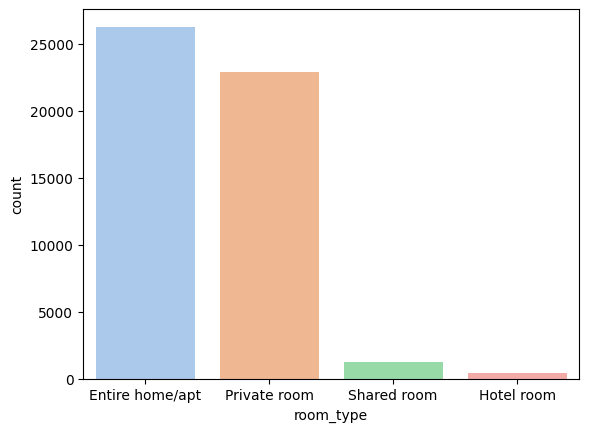

<Figure size 1000x600 with 0 Axes>

In [45]:
# Q5
df_room = df['room_type'].value_counts()
custom_palette = sns.color_palette("pastel")
sns.barplot(x=df_room.index, y=df_room, palette=custom_palette)
plt.figure(figsize=(10, 6))
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5261/1819919701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_room.index, y=df_ratio, palette=custom_palette)
/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5261/1819919701.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=df_room.index, y=df_ratio, palette=custom_palette)


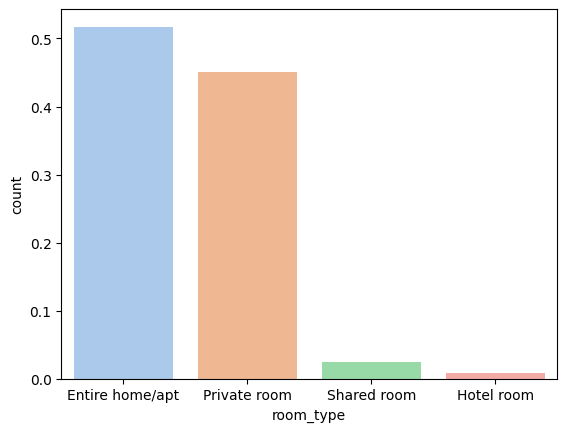

<Figure size 1000x600 with 0 Axes>

In [48]:
# Q6
# Q5
df_room = df['room_type'].value_counts()
df_ratio = df_room / len(df)
custom_palette = sns.color_palette("pastel")
sns.barplot(x=df_room.index, y=df_ratio, palette=custom_palette)
plt.figure(figsize=(10, 6))
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

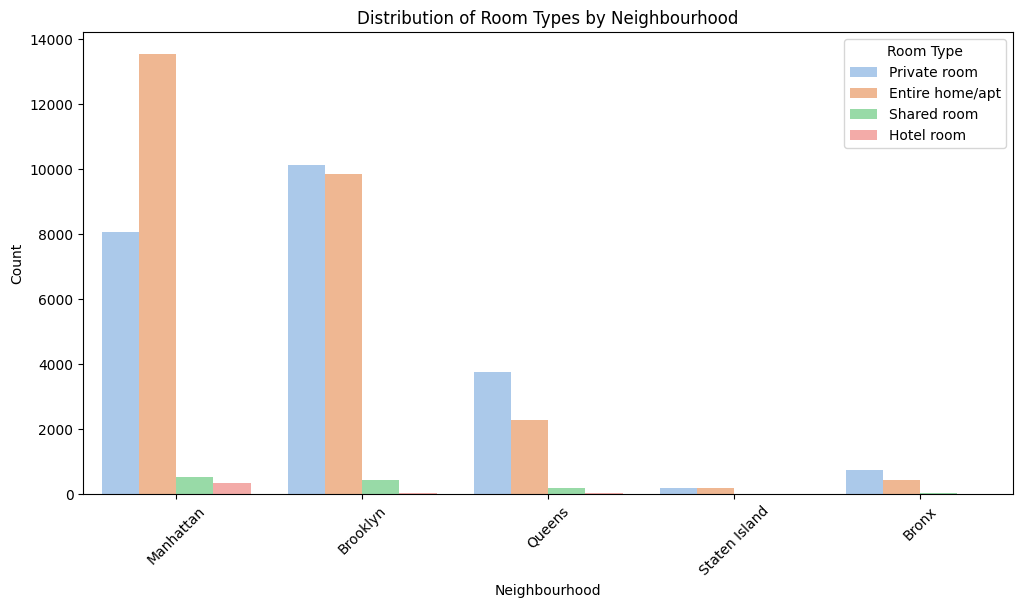

In [52]:
# Q7
plt.figure(figsize=(12, 6))
sns.countplot(x=df['neighborhood'], hue=df['room_type']/)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Room Types by Neighbourhood')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


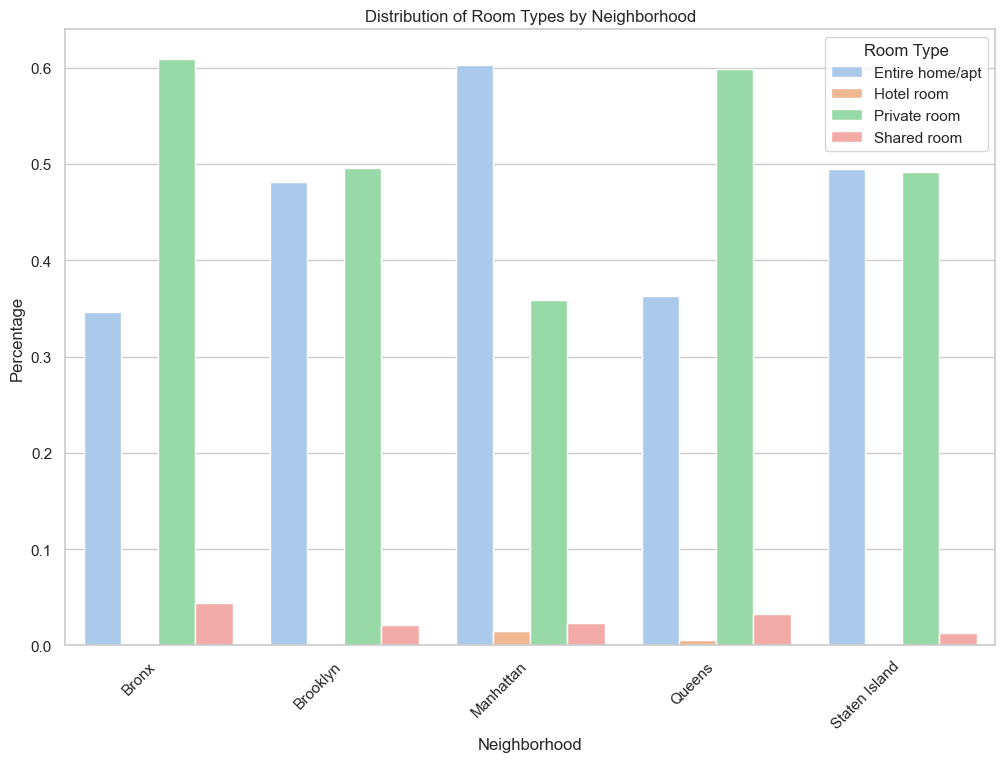

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Calculate the room_type distribution by neighborhood
room_type_counts = df.groupby(['neighborhood', 'room_type']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Reset the index for easy plotting
room_type_counts = room_type_counts.reset_index()

# Set the style
sns.set(style="whitegrid")

# Melt the DataFrame to have 'room_type' as a separate column
room_type_counts_melted = room_type_counts.melt(id_vars='neighborhood', var_name='room_type', value_name='percentage')

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood', y='percentage', data=room_type_counts_melted, hue='room_type', palette='pastel')

# Adding labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Percentage')
plt.title('Distribution of Room Types by Neighborhood')
plt.legend(title='Room Type', bbox_to_anchor=(1, 1))

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

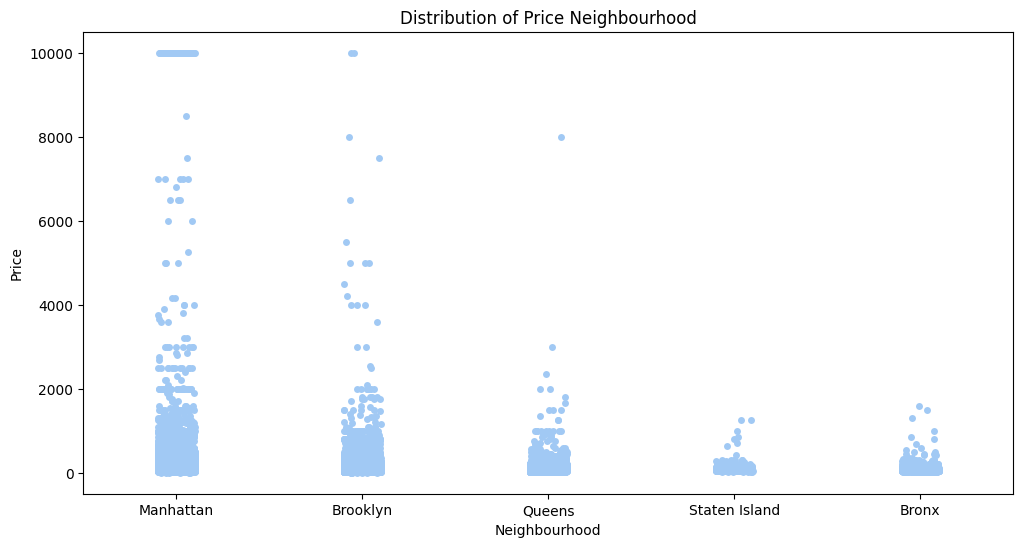

In [63]:
# Q8
plt.figure(figsize=(12, 6))
sns.stripplot(x=df['neighborhood'], y=df['price'])
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Distribution of Price Neighbourhood')
plt.show()

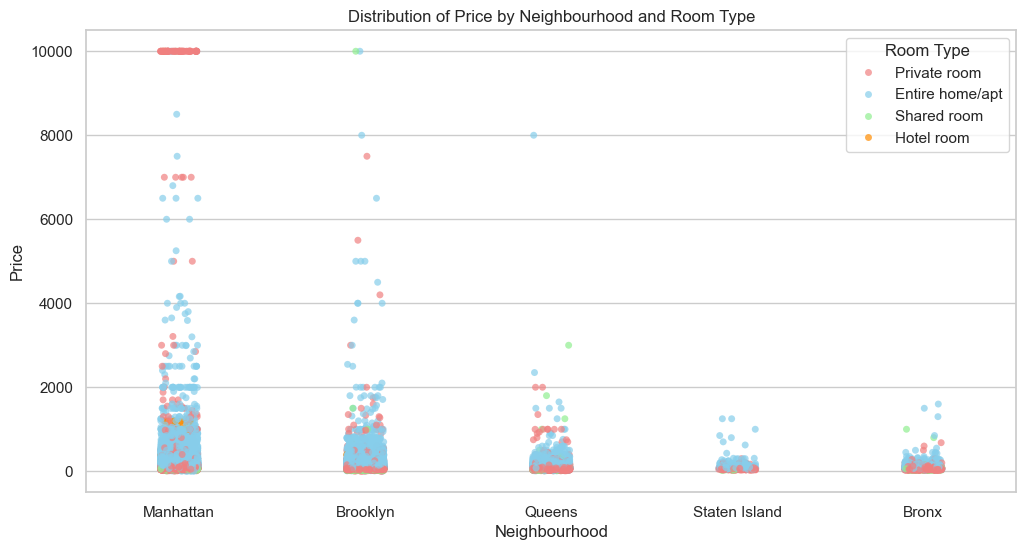

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Define a custom color palette
custom_palette = {'Entire home/apt': 'skyblue', 'Private room': 'lightcoral', 'Shared room': 'lightgreen', 'Hotel room': 'darkorange'}

plt.figure(figsize=(12, 6))
sns.stripplot(x='neighborhood', y='price', hue='room_type', data=df, jitter=True, palette=custom_palette, alpha=0.7)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Distribution of Price by Neighbourhood and Room Type')
plt.legend(title='Room Type', bbox_to_anchor=(1, 1))
plt.show()


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
#1 Bronx 지역, Staten Island 지역 가격이 저렴한 편, Manhattan 지역 가격이 비싼 편이다. 
#2 Manhattan/Brooklyn 지역은 방도 많고, 상대적 가격도 비싼 편. 
#3 Bronx/Staten Island 지역은 방도 적고, 상대적 가격도 저렴한 편.
#4 Manhattan은 Entrire home/apt 비율이 높고, 다른 지역은 Private room이 상대적으로 높다. 
#5 Manhattan의 경우 Private room의 가격이 최상위권을 차지하고 있는데, 다른 지역은 Entire home/apt의 가격이 최상위권을 차지하고 있다. 


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

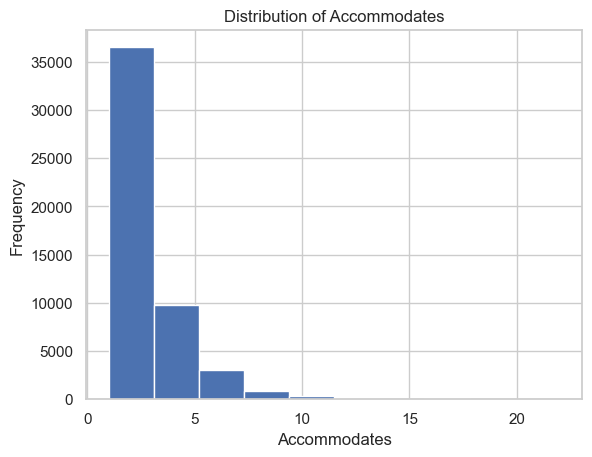

In [82]:
# Q10
import matplotlib.pyplot as plt

# Q10
plt.hist(df['accommodates'], bins=10)
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.title('Distribution of Accommodates')
plt.show()



- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

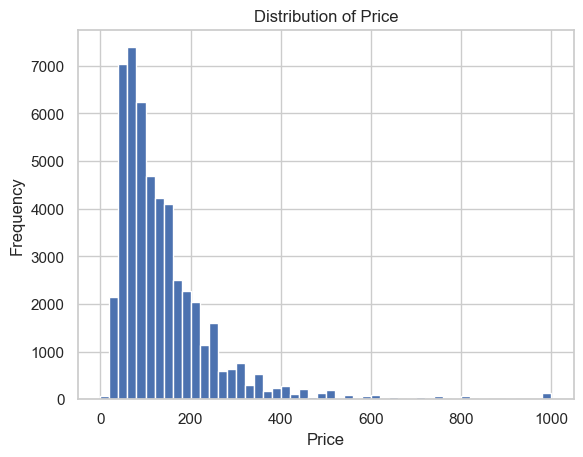

In [83]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=50, range=(0, 1000))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [121]:
df = pd.read_csv('/Users/daniel/Desktop/y_bigta/0109_EDA:FE/Data/airbnb_listings.csv', index_col=0)

/var/folders/bz/05qb09453nn21vlxt_xbdzrm0000gn/T/ipykernel_5879/1516998751.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/daniel/Desktop/y_bigta/0109_EDA:FE/Data/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [122]:
# Drop columns with more than 25% missing values
columns_to_drop = df.columns[df.isnull().mean() >= 0.25]
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)

# Drop rows with missing values between 10% and 25%
rows_to_drop = df.index[df.isnull().mean(axis=1) >= 0.1]
df = df.drop(index=rows_to_drop)

# Replace missing values with median for numeric columns with less than 10% missing values
numeric_columns_to_fill = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and df[col].isnull().mean() < 0.1]
df[numeric_columns_to_fill] = df[numeric_columns_to_fill].fillna(df[numeric_columns_to_fill].median())


Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'license', 'jurisdiction_names'],
      dtype='object')


In [123]:
df.isnull().sum()


id                                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighborhood                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_30                     0
availability

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [159]:
#Q13-1
#Amenity가 분명히 객실 선호도에 영향을 줄 것이라고 생각하는데, 지금의 Amenity는 분석에 적합하지 않다고 생각한다. 
#따라서 Amenity 당 각각 컬럼을 만들어 유무에 따라 0, 1로 표현하고, 추후 모델 활용하며 다시 설명력이 떨어지는 변수를 제거 -> 차원 축소
import re

# 정규 표현식을 사용하여 중괄호 안의 내용을 추출하고 따옴표 없애기
def process_amenities(amenities_str):
    matches = re.findall(r'{(.*?)}', amenities_str)
    if matches:
        items = [item.strip().strip('"') for item in matches[0].split(',')]
        return set(items)
    else:
        return set()

# 'amenities' 열에 함수 적용하여 새로운 열 생성
df['parsed_amenities'] = df['amenities'].apply(process_amenities)
df['parsed_amenities'] = df['parsed_amenities'].apply(lambda amenities_set: {f'"{item}"' for item in amenities_set})

# 결과 확인
print(df['parsed_amenities'])

# 각 셀의 set을 합치고 리스트로 변환
combined_amenities_list = df['parsed_amenities'].apply(set)

# 리스트의 합집합을 구함
union_of_amenities = set().union(*combined_amenities_list)

# 중복이 없는 유일한 항목 확인
unique_amenities = list(union_of_amenities)
unique_amenities = [item.strip('"') for item in unique_amenities]
unique_amenities.remove('')

print('')
print("유일한 항목:", unique_amenities)
print("유일한 항목 수:", len(unique_amenities))



1        {"Fire extinguisher", "Bathtub", "Hair dryer",...
2        {"Fire extinguisher", "Children’s books and to...
3        {"Fire extinguisher", "translation missing: en...
4        {"Wifi", "Washer", "Dryer", "Kitchen", "TV", "...
5        {"Pets live on this property", "Wifi", "Kitche...
                               ...                        
50490    {"Fire extinguisher", "Shampoo", "Hair dryer",...
50526    {"Wifi", "Fire extinguisher", "Private living ...
50598    {"Wifi", "Iron", "Fire extinguisher", "Private...
50650    {"Shampoo", "Hair dryer", "Dishwasher", "Iron"...
50694    {"Breakfast", "Wifi", "Iron", "Kitchen", "Sham...
Name: parsed_amenities, Length: 39347, dtype: object
유일한 항목: ['Wide clearance to shower', 'Children’s books and toys', 'Wheelchair accessible', 'Elevator', 'Dog(s)', 'Dishwasher', 'Well-lit path to entrance', 'translation missing: en.hosting_amenity_50', 'Private living room', 'Turndown service', 'Wide entryway', 'Single level home', 'Ethernet conne

In [ ]:
for amenity in unique_amenities:
    df[amenity] = df.apply(lambda row: 1 if amenity in row['amenities'] else 0, axis=1)
    print(df[amenity].sum(), amenity)



#각 amenity를 0 과 1로 분리하고, 추후 모델 형성 후 변수 중요도 파악 후 제거 예정



In [ ]:
#Q13-2)
# 'host_verifications' 열의 값들을 리스트로 가져오기
verifications_lists = df['host_verifications'].apply(lambda x: x.strip("[]").replace("'", "").split(", ")).tolist()

# 중복을 제외하고 모든 항목 추출
unique_verifications = set().union(*[set(lst) for lst in verifications_lists])
unique_verifications_list = list(unique_verifications)
unique_verifications_list.remove('')
# 결과 출력
print("중복을 제외한 모든 항목:", unique_verifications_list)

for item in unique_verifications_list:
    df[item] = df.apply(lambda row: 1 if item in row['host_verifications'] else 0, axis=1)
    print(df[item].sum(), item)


In [140]:
#Q13-3) #host_listings_count와 host_total_listings_count는 같은 값이므로, 하나의 컬럼만 남겨준다. 
df_new = df[df['host_listings_count'] != df['host_total_listings_count']]
print(df_new)

#-> drop
df = df.drop(columns=['host_total_listings_count'])



Empty DataFrame
Columns: [id, host_is_superhost, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighborhood, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, price, guests_included, extra_people, minimum_nights, maximum_nights, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, requires_license, instant_bookable, is_business_travel_ready, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, reviews_per_month, parsed_amenities, Wide clearance to shower, Children’s books and toys, Wheelchair accessible, Elevator, Dog(s), Dishwasher, Well-lit path to entrance, translat

In [145]:
#Q13-4) host_verifications는 모든 값이 true이므로 의미가 없다고 판단하여 drop
df['has_availability'].value_counts()
df = df.drop(columns=['has_availability'])

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
